#
##Stats 131 Final Project
##By Group: We Push to Master
##Group members: Minsu Jeon, Junyan Zheng, Jaspreet Kang, Melissa Duffus

#Background:

##Why we chose the Data:
As graduating seniors, we have all been thinking about our futures, such as jobs, building a family and most importantly purchasing a home. Something that is important to do when buying a home is analyze which is the best fit for us, specifically, the price of it. To help us learn about the variables that determine the price of a house we decided to look for housing data in Kaggle. Although we wanted to find a dataset that was closest to this year by time period, the closest and most interesting dataset we found was House Sales in King County. The Data is a set of houses sold in between May 2014 and May 2015 in King County, Washington. 

The reason we found this data set interesting is due the fact that the most popular city in King County, Seattle, has been a fast growing city in the past couple of years, specifically for tech companies. As statistics majors and our interest in technology, Seattle is a top choice for seeking future employment and a future home. The increase in technology not only has opened opportunities for more jobs, we believe it has also affected the price of homes in Seattle and nearby city in King County, Washington. 

##Common Knowledge:
It is understandable and most common for a person to think the more bedrooms and the more bathrooms a home has the more it will cost. However, it is not the only factor in increasing the price value for a house. The appearance of the neighborhood will also have an affect on the house.

##Other Research:
Yulia Norenko, Howard Chang, Lavanya Gupta and Silvia Lu similarly used machine learning algorithms to predict the prices of houses. They used a different data set, however some of the variables in their dataset are similar to the variables in our dataset. Some of the more important variables they found in predicting house prices were "Above Grade Living Area Square feet", "Overall Condition", and "the Neighborhoods".  

The link to the data we used:
https://www.kaggle.com/harlfoxem/housesalesprediction

##Variable Explanation:
-Id: A number used to indentify the houses in the data set.
-Date: The Date the house was sold. Represented by YearMonthDayTime, where T and the time was not captured, but entered as 0s.
-Price: The Price is the prediciton target, or the price the house was sold for. The observational unit is in dollars. 
-Bedrooms: The number of bedrooms in the house.
-Bathrooms: The unit is an decimal, representing the number of bathrooms in the house, where 1/2 would mean a smaller than normal restroom with no shower.
-Sqft_living: The unit is an integer, representing the size in square footage of the home.
-Sqft_lot: The unit is an integer, representing the size in square footage of the lot.
-Floors: The total number of floors or levels in house.
-Waterfront: The observational unit is an dummy variable of 0 or 1, where 1 represents the house which has a view to a waterfront, and 0 represents a house without a view to a waterfront.
-View: The observational unit is an integer ranging from 0 to 5, representing the number of times the house has been viewed.
-Condition: The observational unit is an integer ranging from 1 to 5, representing how good the condition is of the house is overall.
-Grade: The observational unit is an integer, representing the overall grade given to the housing unit, based on King County grading system.
-Sqft_above: The size in square footage of house apart from basement.
-Sqft_basement: The size in square footage of the basement.
-Yr_built: Thhe year the home was built.
-Yr_renovated: The year when house was renovated.
-Zipcode: The zip code the house is located in.
-Lat: Latitude coordinate of the house.
-Long: Longitude coordinate of the house.
-Sqft_living15: The size of the living room area in 2015 which implies there have been some renovations. This might or might not have affected the lotsize area
-Sqft_lot15: The size of the lot area in 2015, this implies some renovations.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

Read the data:

In [23]:
kc = pd.read_csv("kc_house_data.csv")

#Exploratory Analysis: 
First we take a quick look at the data to see if there are any missing values, that all variables are formatted correctly or if any changes need to be made to clean up the data.

In [24]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


We have checked that there are no missing values and all variables are in the correct type.
Since the date is not written properly, we went ahead and changed the format.

In [9]:
kc.date = pd.to_datetime({'year':kc.date.str[:4], 'month':kc.date.str[4:6], 'day':kc.date.str[6:8]})
kc.head()

We can see that our dataset has 21613 observations of houses and 21 columns or variables that describe these houses. 

##Basic Summary Statistics:

In [26]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We noticed that the max number of bedrooms in a house was 33 and max number of bathrooms in a house is 8 which seem a bit off, we will do some further investigation to determine if there are potential outliers.

In [29]:
kc[kc.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [ ]:
kc[kc.bathrooms==8]

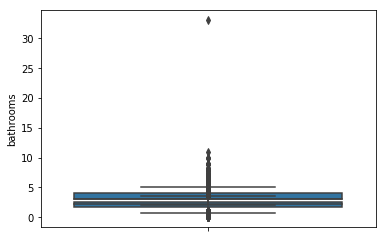

In [31]:
sns.boxplot(y="bedrooms",data=kc)

In [ ]:
sns.boxplot(y="bathrooms",data=kc)

We did some further investigation by finding the data points and looking into the other variables to determine if these results are reasonable. For the observation of 33 bedrooms, since the price for the home is not over a million and the number of restrooms for the home is 1.75 we believed it was an outlier or a typo. After doing a boxplot of the number of bedrooms we found that it is indeed an outlier. For the houses with 8 bathrooms we found that they had an almost similar amount of bedrooms and after doing a boxplot for the number of bathrooms we found they are not outliers.

In [32]:
myImage = Image.open("King County w Houses as Points.jpeg")
myImage.show()

In [33]:
myImage = Image.open("Average price by City.jpeg")
myImage.show()

In [34]:
myImage = Image.open("King county bedrooms.jpeg")
myImage.show()